### 16 Jan 2023

# Fig. 7 code

In [89]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## 2014

### 1. Read seal data

In [90]:
# # Amundsen seal tag 2014 (some 2006 too)
# seal14_file = '../AmundsenSeal2014.pkl'

# To read from pickle after already created 
seal14 = pd.read_pickle('seal14_file')

### 2. Partition by month and by warm/cool(background) profiles

In [91]:
# T cutoff thresh (defined in fig. 5 script)
# define cool ("background") dives in dataframe within bounding box lat/lon
coolsurf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-74.9 < LATITUDE < -74 & -104.7 < LONGITUDE < -102 & 0.0 <= z <= 20')
coolsurfMJJA14 = coolsurf[(coolsurf['Datetime']>='2014-5-1') & (coolsurf['Datetime']<'2014-9-1')] # constrain winter months

# calculate temperature treshold at 3std > background surface mean
thresh2014 = coolsurfMJJA14['CT'].mean() + 3*coolsurfMJJA14['CT'].std()

# Cutoff T in deg C
print('2014 threshold:',thresh2014) #CT

2014 threshold: -1.5401140979068026


#### May 2014

In [92]:
# isolate may14 data
may14surf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
may14surf = may14surf[(may14surf['Datetime']>='2014-5-1') & (may14surf['Datetime']<'2014-6-1')]  # now constraining dates
may14surf = may14surf.reset_index()

# round lat,lon
may14surf['LAT_rounded'] = round(may14surf.iloc[:,3],4)
may14surf['LONG_rounded'] = round(may14surf.iloc[:,4],4)

# Groubpy (on rounded cols)
may14surf = may14surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
may14surf = may14surf.reset_index()
#may14surf.head(5)

# isolate warm profiles based on thresh
may14surfwarm = may14surf[may14surf.iloc[:,5] > thresh2014] #col 5 is CT, wherever CT > cutoff, define as may20surfwarm
may14surfcool = may14surf[may14surf.iloc[:,5] < thresh2014] #same for cool

# add rounded lat long to seal20 so that we have same header and vals
seal14['LAT_rounded'] = round(seal14.iloc[:,0],4)
seal14['LONG_rounded'] = round(seal14.iloc[:,1],4)

# isolate warm profiles w entire depth information
may14w = seal14[seal14['LAT_rounded'].isin(may14surfwarm['LAT_rounded']) & seal14['LONG_rounded'].isin(may14surfwarm['LONG_rounded'])]
may14c = seal14[seal14['LAT_rounded'].isin(may14surfcool['LAT_rounded']) & seal14['LONG_rounded'].isin(may14surfcool['LONG_rounded'])]

#### June 2014

In [93]:
# isolate june14 data
june14surf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
june14surf = june14surf[(june14surf['Datetime']>='2014-6-1') & (june14surf['Datetime']<'2014-7-1')]  # now constraining dates
june14surf = june14surf.reset_index()

# round lat,lon
june14surf['LAT_rounded'] = round(june14surf.iloc[:,3],4)
june14surf['LONG_rounded'] = round(june14surf.iloc[:,4],4)

# Groubpy (on rounded cols)
june14surf = june14surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
june14surf = june14surf.reset_index()

# isolate warm profiles based on threshold
june14surfwarm = june14surf[june14surf.iloc[:,5] > thresh2014] 
june14surfcool = june14surf[june14surf.iloc[:,5] < thresh2014] 

# add rounded lat long to seal20 so that we have same header and vals
seal14['LAT_rounded'] = round(seal14.iloc[:,0],4)
seal14['LONG_rounded'] = round(seal14.iloc[:,1],4)

# isolate warm profiles w entire depth information
june14w = seal14[seal14['LAT_rounded'].isin(june14surfwarm['LAT_rounded']) & seal14['LONG_rounded'].isin(june14surfwarm['LONG_rounded'])]
june14c = seal14[seal14['LAT_rounded'].isin(june14surfcool['LAT_rounded']) & seal14['LONG_rounded'].isin(june14surfcool['LONG_rounded'])]

#### July 2014

In [94]:
# isolate july14 data
july14surf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
july14surf = july14surf[(july14surf['Datetime']>'2014-7-1') & (july14surf['Datetime']<'2014-8-1')]  # now constraining dates
july14surf = july14surf.reset_index()

# round lat,lon
july14surf['LAT_rounded'] = round(july14surf.iloc[:,3],4)
july14surf['LONG_rounded'] = round(july14surf.iloc[:,4],4)

# Groubpy (on rounded cols)
july14surf = july14surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
july14surf = july14surf.reset_index()

# isolate warm profiles based on threshold
july14surfwarm = july14surf[july14surf.iloc[:,5] > thresh2014]
july14surfcool = july14surf[july14surf.iloc[:,5] < thresh2014] 

# add rounded lat long to seal20 so that we have same header and vals
seal14['LAT_rounded'] = round(seal14.iloc[:,0],4)
seal14['LONG_rounded'] = round(seal14.iloc[:,1],4)

# isolate warm profiles w entire depth information
july14w = seal14[seal14['LAT_rounded'].isin(july14surfwarm['LAT_rounded']) & seal14['LONG_rounded'].isin(july14surfwarm['LONG_rounded'])]
july14c = seal14[seal14['LAT_rounded'].isin(july14surfcool['LAT_rounded']) & seal14['LONG_rounded'].isin(july14surfcool['LONG_rounded'])]

#### August 2014

In [95]:
# isolate aug14 data
aug14surf = seal14[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
aug14surf = aug14surf[(aug14surf['Datetime']>'2014-8-1') & (aug14surf['Datetime']<'2014-9-1 ')]  # now constraining dates
aug14surf = aug14surf.reset_index()

# round lat,lon
aug14surf['LAT_rounded'] = round(aug14surf.iloc[:,3],4)
aug14surf['LONG_rounded'] = round(aug14surf.iloc[:,4],4)

# Groubpy (on rounded cols)
aug14surf = aug14surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
aug14surf = aug14surf.reset_index()

# isolate warm profiles based on thresh
aug14surfwarm = aug14surf[aug14surf.iloc[:,5] > thresh2014]
aug14surfcool = aug14surf[aug14surf.iloc[:,5] < thresh2014]

# add rounded lat long to seal20 so that we have same header and vals
seal14['LAT_rounded'] = round(seal14.iloc[:,0],4)
seal14['LONG_rounded'] = round(seal14.iloc[:,1],4)

# isolate warm profiles w entire depth information
aug14w = seal14[seal14['LAT_rounded'].isin(aug14surfwarm['LAT_rounded']) & seal14['LONG_rounded'].isin(aug14surfwarm['LONG_rounded'])]
aug14c = seal14[seal14['LAT_rounded'].isin(aug14surfcool['LAT_rounded']) & seal14['LONG_rounded'].isin(aug14surfcool['LONG_rounded'])]

### Concatenate MJJA warm 2014 into one big df

In [96]:
# warm profiles only here
mjja2014_w = pd.concat([may14w,june14w,july14w,aug14w])  #recall no may14w data, so starts in June
# cool profiles here (this data/fig equivalent was in supplement, not main text)
#mjja2014_c = pd.concat([may14c,june14c,july14c,aug14c]) 

### 3. Bin all 2014 warm data into 50 m intervals (as per Sutherland et al. (2013) corr plot)

In [97]:
# Bin into 50 m intervals warm
mjja2014_w_0to50 = mjja2014_w.query('0 <= z <= 50')
mjja2014_w_50to100 = mjja2014_w.query('50 <= z <= 100')
mjja2014_w_100to150 = mjja2014_w.query('100 <= z <= 150')
mjja2014_w_150to200 = mjja2014_w.query('150 <= z <= 200')
mjja2014_w_200to250 = mjja2014_w.query('200 <= z <= 250')
mjja2014_w_250to300 = mjja2014_w.query('250 <= z <= 300')

### 4. Next need to take avg CT value at depth interval for each dive
Groupy lat, lon and take mean ct

In [98]:
# warm
mjja2014_w_0to50avg = pd.DataFrame(mjja2014_w_0to50.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2014_w_50to100avg = pd.DataFrame(mjja2014_w_50to100.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2014_w_100to150avg = pd.DataFrame(mjja2014_w_100to150.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2014_w_150to200avg = pd.DataFrame(mjja2014_w_150to200.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2014_w_200to250avg = pd.DataFrame(mjja2014_w_200to250.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2014_w_250to300avg = pd.DataFrame(mjja2014_w_250to300.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())

In [99]:
# check shape of each interval
mjja2014_w_0to50avg.shape, mjja2014_w_50to100avg.shape, mjja2014_w_100to150avg.shape, mjja2014_w_150to200avg.shape,mjja2014_w_200to250avg.shape,mjja2014_w_250to300avg.shape

# here we want to check smallest no of points of all depth intervals (here 62) as this is limiting number of points we can plot for all layers for x and y to be the same size for plotting

((66, 1), (66, 1), (66, 1), (65, 1), (62, 1), (62, 1))

In [100]:
# reset index in df
mjja2014_w_0to50avg.reset_index(inplace=True)
mjja2014_w_50to100avg.reset_index(inplace=True)
mjja2014_w_100to150avg.reset_index(inplace=True) 
mjja2014_w_150to200avg.reset_index(inplace=True) 
mjja2014_w_200to250avg.reset_index(inplace=True)
mjja2014_w_250to300avg.reset_index(inplace=True)

### 5. Calculate trendline using polyfit for each 50 m depth interval w.r.t. surface layer (defined here as upper 50 m)

In [101]:
# polyfit
# 50 to 100
t50to100 = np.polyfit(mjja2014_w_50to100avg['CT'].iloc[0:62], mjja2014_w_0to50avg['CT'].iloc[0:62], 1)
p50to100 = np.poly1d(t50to100)

# 100 to 150
t100to150 = np.polyfit(mjja2014_w_100to150avg['CT'].iloc[0:62], mjja2014_w_0to50avg['CT'].iloc[0:62], 1)
p100to150 = np.poly1d(t100to150)

# 150 to 200
t150to200 = np.polyfit(mjja2014_w_150to200avg['CT'].iloc[0:62], mjja2014_w_0to50avg['CT'].iloc[0:62], 1)
p150to200 = np.poly1d(t150to200)

# 200 to 250
t200to250 = np.polyfit(mjja2014_w_200to250avg['CT'].iloc[0:62], mjja2014_w_0to50avg['CT'].iloc[0:62], 1)
p200to250 = np.poly1d(t200to250)

# 250 to 300
t250to300 = np.polyfit(mjja2014_w_250to300avg['CT'].iloc[0:62], mjja2014_w_0to50avg['CT'].iloc[0:62], 1)
p250to300 = np.poly1d(t250to300)

### 6. Plot results (data and trendline) for each 50 m interval and surface layer pair

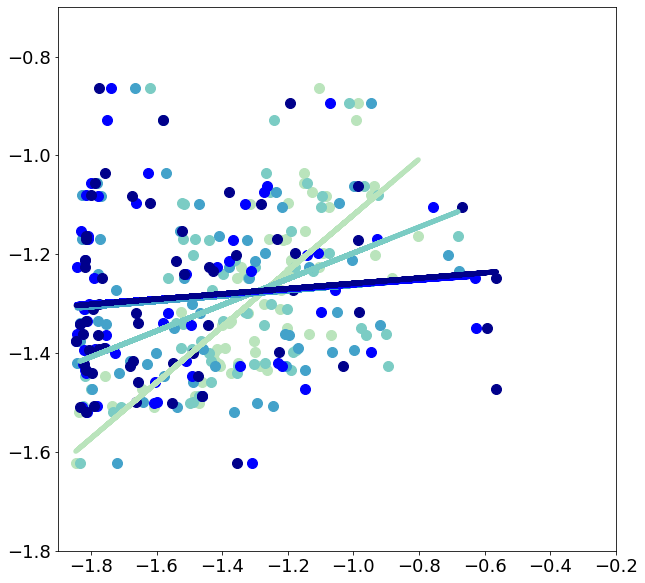

In [102]:
plt.figure(figsize=(10,10))
# data
plt.scatter(mjja2014_w_50to100avg['CT'].iloc[0:62],mjja2014_w_0to50avg['CT'].iloc[0:62],marker='o',alpha=1, s=100,color = '#bae4bc')
plt.scatter(mjja2014_w_100to150avg['CT'].iloc[0:62],mjja2014_w_0to50avg['CT'].iloc[0:62],marker='o',alpha=1,s=100,color = '#7bccc4')
plt.scatter(mjja2014_w_150to200avg['CT'].iloc[0:62],mjja2014_w_0to50avg['CT'].iloc[0:62],marker='o',alpha=1,s=100,color = '#43a2ca')
plt.scatter(mjja2014_w_200to250avg['CT'].iloc[0:62],mjja2014_w_0to50avg['CT'].iloc[0:62],marker='o',alpha=1,s=100,color = 'b')
plt.scatter(mjja2014_w_250to300avg['CT'].iloc[0:62],mjja2014_w_0to50avg['CT'].iloc[0:62],marker='o',alpha=1,s=100,color = 'darkblue')

# trendline
plt.plot(mjja2014_w_50to100avg['CT'].iloc[0:62],p50to100(mjja2014_w_50to100avg['CT'].iloc[0:62]),color = '#bae4bc',linewidth=5)#,label = "y=%.2fx+%.2f"%(p50to100[1],p50to100[0]))
plt.plot(mjja2014_w_100to150avg['CT'].iloc[0:62],p100to150(mjja2014_w_100to150avg['CT'].iloc[0:62]),color = '#7bccc4',linewidth=5)#,label = "y=%.2fx+%.2f"%(p100to150[1],p100to150[0]))
plt.plot(mjja2014_w_150to200avg['CT'].iloc[0:62],p150to200(mjja2014_w_150to200avg['CT'].iloc[0:62]),color = '#43a2ca',linewidth=5)#,label = "y=%.2fx+%.2f"%(p150to200[1],p150to200[0]))
plt.plot(mjja2014_w_200to250avg['CT'].iloc[0:62],p200to250(mjja2014_w_200to250avg['CT'].iloc[0:62]),color = 'b',linewidth=5)#,label = "y=%.2fx+%.2f"%(p200to250[1],p200to250[0]))
plt.plot(mjja2014_w_250to300avg['CT'].iloc[0:62],p250to300(mjja2014_w_250to300avg['CT'].iloc[0:62]),color = 'darkblue',linewidth=5)#,label = "y=%.2fx+%.2f"%(p250to300[1],p250to300[0]))

# plt.ylabel('Seal T [C] at z = 0-50 m',fontsize=15)
# plt.xlabel('Seal T at different depth intervals (see legend) [C]',fontsize=15)

# plt.title('2014',fontsize=20)

plt.xlim(-1.9,-0.2)
#plt.xlim(-1.9,-0.4)
#plt.ylim(-1.9,-0.4)
plt.ylim(-1.8,-0.7)
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=15)
plt.xticks(fontsize=18);plt.yticks(fontsize=18)  

plt.savefig('fig7_2014_updated.png', format='png', dpi=400)
plt.show()

In [103]:
# get some stats

# returns (r coeff, pval)
a = (stats.pearsonr(mjja2014_w_50to100avg['CT'][0:62], mjja2014_w_0to50avg['CT'].iloc[0:62]))
b = (stats.pearsonr(mjja2014_w_100to150avg['CT'][0:62], mjja2014_w_0to50avg['CT'].iloc[0:62]))
c = (stats.pearsonr(mjja2014_w_150to200avg['CT'][0:62], mjja2014_w_0to50avg['CT'].iloc[0:62]))
d = (stats.pearsonr(mjja2014_w_200to250avg['CT'][0:62], mjja2014_w_0to50avg['CT'].iloc[0:62]))
e = (stats.pearsonr(mjja2014_w_250to300avg['CT'][0:62], mjja2014_w_0to50avg['CT'].iloc[0:62]))

a,b,c,d,e

((0.7614321006357867, 6.742482465543459e-13),
 (0.38888537003336415, 0.0017857987236537117),
 (0.09847490180318427, 0.4463789669184985),
 (0.09427743296521393, 0.4660875524334001),
 (0.11069663712511765, 0.3917077953379484))

In [104]:
# r2
a[0]**2,b[0]**2,c[0]**2,d[0]**2,e[0]**2

(0.5797788438786268,
 0.15123183102598656,
 0.009697306285146786,
 0.008888234366510407,
 0.012253745470809976)

Light to dark blues indicate shallow to deeper layers. See manuscript for details.

### 7. Extra: Save montly cool and warm subsetted dataframes as pickle files to save time and load into the next, fig. 8 script

In [105]:
# save pickle files (comment this out after running)
# may14c.to_pickle('may14c_file')
# may14w.to_pickle('may14w_file')

# june14c.to_pickle('june14c_file')
# june14w.to_pickle('june14w_file')

# july14c.to_pickle('july14c_file')
# july14w.to_pickle('july14w_file')

# aug14c.to_pickle('aug14c_file')
# aug14w.to_pickle('aug14w_file')

## 2019

### 1. Read seal data

In [106]:
# To read from pickle after already created 
seal19 = pd.read_pickle('seal19_file')

### 2. Partition by month and by warm/cool(background) profiles

In [107]:
# T cutoff thresh (defined in fig. 5 script)
# define cool ("background") dives in dataframe within bounding box lat/lon
coolsurf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-74.9 < LATITUDE < -74 & -104.7 < LONGITUDE < -102 & 0.0 <= z <= 20')
coolsurfMJJA19 = coolsurf[(coolsurf['Datetime']>='2019-5-1') & (coolsurf['Datetime']<'2019-9-1')] # constrain winter months

# calculate temperature treshold at 3std > background surface mean
thresh2019 = coolsurfMJJA19['CT'].mean() + 3*coolsurfMJJA19['CT'].std()

# Cutoff T in deg C
print('2019 threshold:',thresh2019) #CT

2019 threshold: -1.685284795066211


#### May 2019

In [108]:
# isolate may19 data
may19surf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
may19surf = may19surf[(may19surf['Datetime']>='2019-5-1') & (may19surf['Datetime']<'2019-6-1')]  # now constraining dates
may19surf = may19surf.reset_index()

# round lat,lon
may19surf['LAT_rounded'] = round(may19surf.iloc[:,3],4)
may19surf['LONG_rounded'] = round(may19surf.iloc[:,4],4)

# Groubpy (on rounded cols)
may19surf = may19surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
may19surf = may19surf.reset_index()
#may19surf.head(5)

# isolate warm profiles based on thresh
may19surfwarm = may19surf[may19surf.iloc[:,5] > thresh2019] #col 5 is CT, wherever CT > cutoff, define as may19surfwarm
may19surfcool = may19surf[may19surf.iloc[:,5] < thresh2019] #same for cool

# add rounded lat long to seal19 so that we have same header and vals
seal19['LAT_rounded'] = round(seal19.iloc[:,0],4)
seal19['LONG_rounded'] = round(seal19.iloc[:,1],4)

# isolate warm profiles w entire depth information
may19w = seal19[seal19['LAT_rounded'].isin(may19surfwarm['LAT_rounded']) & seal19['LONG_rounded'].isin(may19surfwarm['LONG_rounded'])]
may19c = seal19[seal19['LAT_rounded'].isin(may19surfcool['LAT_rounded']) & seal19['LONG_rounded'].isin(may19surfcool['LONG_rounded'])]

#### June 2019

In [109]:
# isolate june19 data
june19surf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
june19surf = june19surf[(june19surf['Datetime']>='2019-6-1') & (june19surf['Datetime']<'2019-7-1')]  # now constraining dates
june19surf = june19surf.reset_index()

# round lat,lon
june19surf['LAT_rounded'] = round(june19surf.iloc[:,3],4)
june19surf['LONG_rounded'] = round(june19surf.iloc[:,4],4)

# Groubpy (on rounded cols)
june19surf = june19surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
june19surf = june19surf.reset_index()

# isolate warm profiles based on threshold
june19surfwarm = june19surf[june19surf.iloc[:,5] > thresh2019] 
june19surfcool = june19surf[june19surf.iloc[:,5] < thresh2019] 

# add rounded lat long to seal19 so that we have same header and vals
seal19['LAT_rounded'] = round(seal19.iloc[:,0],4)
seal19['LONG_rounded'] = round(seal19.iloc[:,1],4)

# isolate warm profiles w entire depth information
june19w = seal19[seal19['LAT_rounded'].isin(june19surfwarm['LAT_rounded']) & seal19['LONG_rounded'].isin(june19surfwarm['LONG_rounded'])]
june19c = seal19[seal19['LAT_rounded'].isin(june19surfcool['LAT_rounded']) & seal19['LONG_rounded'].isin(june19surfcool['LONG_rounded'])]

#### July 2019

In [110]:
# isolate july19 data
july19surf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
july19surf = july19surf[(july19surf['Datetime']>'2019-7-1') & (july19surf['Datetime']<'2019-8-1')]  # now constraining dates
july19surf = july19surf.reset_index()

# round lat,lon
july19surf['LAT_rounded'] = round(july19surf.iloc[:,3],4)
july19surf['LONG_rounded'] = round(july19surf.iloc[:,4],4)

# Groubpy (on rounded cols)
july19surf = july19surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
july19surf = july19surf.reset_index()

# isolate warm profiles based on threshold
july19surfwarm = july19surf[july19surf.iloc[:,5] > thresh2019]
july19surfcool = july19surf[july19surf.iloc[:,5] < thresh2019] 

# add rounded lat long to seal19 so that we have same header and vals
seal19['LAT_rounded'] = round(seal19.iloc[:,0],4)
seal19['LONG_rounded'] = round(seal19.iloc[:,1],4)

# isolate warm profiles w entire depth information
july19w = seal19[seal19['LAT_rounded'].isin(july19surfwarm['LAT_rounded']) & seal19['LONG_rounded'].isin(july19surfwarm['LONG_rounded'])]
july19c = seal19[seal19['LAT_rounded'].isin(july19surfcool['LAT_rounded']) & seal19['LONG_rounded'].isin(july19surfcool['LONG_rounded'])]

#### August 2019

In [111]:
# isolate aug19 data
aug19surf = seal19[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
aug19surf = aug19surf[(aug19surf['Datetime']>'2019-8-1') & (aug19surf['Datetime']<'2019-9-1 ')]  # now constraining dates
aug19surf = aug19surf.reset_index()

# round lat,lon
aug19surf['LAT_rounded'] = round(aug19surf.iloc[:,3],4)
aug19surf['LONG_rounded'] = round(aug19surf.iloc[:,4],4)

# Groubpy (on rounded cols)
aug19surf = aug19surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
aug19surf = aug19surf.reset_index()

# isolate warm profiles based on thresh
aug19surfwarm = aug19surf[aug19surf.iloc[:,5] > thresh2019]
aug19surfcool = aug19surf[aug19surf.iloc[:,5] < thresh2019]

# add rounded lat long to seal19 so that we have same header and vals
seal19['LAT_rounded'] = round(seal19.iloc[:,0],4)
seal19['LONG_rounded'] = round(seal19.iloc[:,1],4)

# isolate warm profiles w entire depth information
aug19w = seal19[seal19['LAT_rounded'].isin(aug19surfwarm['LAT_rounded']) & seal19['LONG_rounded'].isin(aug19surfwarm['LONG_rounded'])]
aug19c = seal19[seal19['LAT_rounded'].isin(aug19surfcool['LAT_rounded']) & seal19['LONG_rounded'].isin(aug19surfcool['LONG_rounded'])]

### Concatenate MJJA warm 2019 into one big df

In [112]:
# warm profiles only here
mjja2019_w = pd.concat([may19w,june19w,july19w,aug19w])  #recall no may19w data, so starts in June
# cool profiles here (this data/fig equivalent was in supplement, not main text)
#mjja2019_c = pd.concat([may19c,june19c,july19c,aug19c]) 

### 3. Bin all 2019 warm data into 50 m intervals (as per Sutherland et al. (2013) corr plot)

In [113]:
# Bin into 50 m intervals warm
mjja2019_w_0to50 = mjja2019_w.query('0 <= z <= 50')
mjja2019_w_50to100 = mjja2019_w.query('50 <= z <= 100')
mjja2019_w_100to150 = mjja2019_w.query('100 <= z <= 150')
mjja2019_w_150to200 = mjja2019_w.query('150 <= z <= 200')
mjja2019_w_200to250 = mjja2019_w.query('200 <= z <= 250')
mjja2019_w_250to300 = mjja2019_w.query('250 <= z <= 300')

### 4. Next need to take avg CT value at depth interval for each dive
Groupy lat, lon and take mean ct

In [114]:
# warm
mjja2019_w_0to50avg = pd.DataFrame(mjja2019_w_0to50.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2019_w_50to100avg = pd.DataFrame(mjja2019_w_50to100.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2019_w_100to150avg = pd.DataFrame(mjja2019_w_100to150.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2019_w_150to200avg = pd.DataFrame(mjja2019_w_150to200.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2019_w_200to250avg = pd.DataFrame(mjja2019_w_200to250.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2019_w_250to300avg = pd.DataFrame(mjja2019_w_250to300.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())

In [115]:
# check shape of each interval
mjja2019_w_0to50avg.shape, mjja2019_w_50to100avg.shape, mjja2019_w_100to150avg.shape, mjja2019_w_150to200avg.shape,mjja2019_w_200to250avg.shape,mjja2019_w_250to300avg.shape

# here we want to check smallest no of points of all depth intervals (here 68) as this is limiting number of points we can plot for all layers for x and y to be the same size for plotting

((71, 1), (71, 1), (70, 1), (70, 1), (69, 1), (68, 1))

In [116]:
# reset index in df
mjja2019_w_0to50avg.reset_index(inplace=True)
mjja2019_w_50to100avg.reset_index(inplace=True)
mjja2019_w_100to150avg.reset_index(inplace=True) 
mjja2019_w_150to200avg.reset_index(inplace=True) 
mjja2019_w_200to250avg.reset_index(inplace=True)
mjja2019_w_250to300avg.reset_index(inplace=True)

### 5. Calculate trendline using polyfit for each 50 m depth interval w.r.t. surface layer (defined here as upper 50 m)

In [117]:
# polyfit
# 50 to 100
t50to100 = np.polyfit(mjja2019_w_50to100avg['CT'].iloc[0:68], mjja2019_w_0to50avg['CT'].iloc[0:68], 1)
p50to100 = np.poly1d(t50to100)

# 100 to 150
t100to150 = np.polyfit(mjja2019_w_100to150avg['CT'].iloc[0:68], mjja2019_w_0to50avg['CT'].iloc[0:68], 1)
p100to150 = np.poly1d(t100to150)

# 150 to 200
t150to200 = np.polyfit(mjja2019_w_150to200avg['CT'].iloc[0:68], mjja2019_w_0to50avg['CT'].iloc[0:68], 1)
p150to200 = np.poly1d(t150to200)

# 200 to 250
t200to250 = np.polyfit(mjja2019_w_200to250avg['CT'].iloc[0:68], mjja2019_w_0to50avg['CT'].iloc[0:68], 1)
p200to250 = np.poly1d(t200to250)

# 250 to 300
t250to300 = np.polyfit(mjja2019_w_250to300avg['CT'].iloc[0:68], mjja2019_w_0to50avg['CT'].iloc[0:68], 1)
p250to300 = np.poly1d(t250to300)

### 6. Plot results (data and trendline) for each 50 m interval and surface layer pair

No handles with labels found to put in legend.


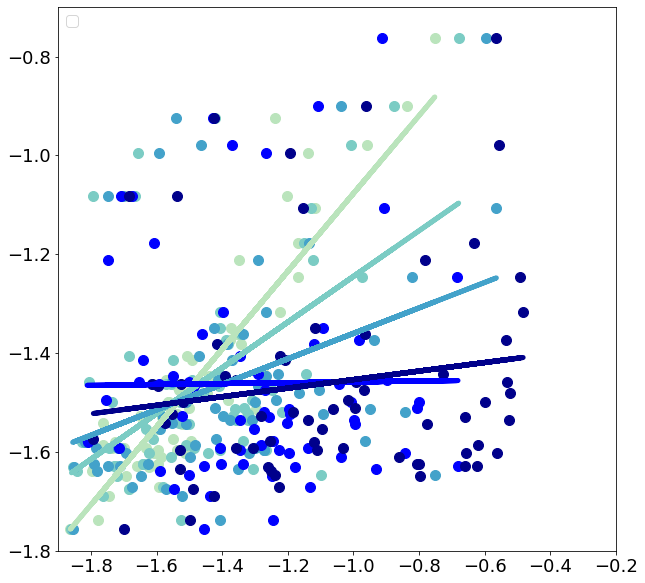

In [118]:
plt.figure(figsize=(10,10))
# data
plt.scatter(mjja2019_w_50to100avg['CT'].iloc[0:68],mjja2019_w_0to50avg['CT'].iloc[0:68],marker='o',alpha=1, s=100,color = '#bae4bc')
plt.scatter(mjja2019_w_100to150avg['CT'].iloc[0:68],mjja2019_w_0to50avg['CT'].iloc[0:68],marker='o',alpha=1,s=100,color = '#7bccc4')
plt.scatter(mjja2019_w_150to200avg['CT'].iloc[0:68],mjja2019_w_0to50avg['CT'].iloc[0:68],marker='o',alpha=1,s=100,color = '#43a2ca')
plt.scatter(mjja2019_w_200to250avg['CT'].iloc[0:68],mjja2019_w_0to50avg['CT'].iloc[0:68],marker='o',alpha=1,s=100,color = 'b')
plt.scatter(mjja2019_w_250to300avg['CT'].iloc[0:68],mjja2019_w_0to50avg['CT'].iloc[0:68],marker='o',alpha=1,s=100,color = 'darkblue')

# trendline
# plt.plot(mjja2019_w_50to100avg['CT'].iloc[0:68],p50to100(mjja2019_w_50to100avg['CT'].iloc[0:68]),color = '#bae4bc',label = '50-100 m',linewidth=5)
# plt.plot(mjja2019_w_100to150avg['CT'].iloc[0:68],p100to150(mjja2019_w_100to150avg['CT'].iloc[0:68]),color = '#7bccc4',label = '100-150 m',linewidth=5)
# plt.plot(mjja2019_w_150to200avg['CT'].iloc[0:68],p150to200(mjja2019_w_150to200avg['CT'].iloc[0:68]),color = '#43a2ca',label = '150-200 m',linewidth=5)
# plt.plot(mjja2019_w_200to250avg['CT'].iloc[0:68],p200to250(mjja2019_w_200to250avg['CT'].iloc[0:68]),color = 'b',label = '200-250 m',linewidth=5)
# plt.plot(mjja2019_w_250to300avg['CT'].iloc[0:68],p250to300(mjja2019_w_250to300avg['CT'].iloc[0:68]),color = 'darkblue',label = '250-300 m',linewidth=5)

plt.plot(mjja2019_w_50to100avg['CT'].iloc[0:68],p50to100(mjja2019_w_50to100avg['CT'].iloc[0:68]),color = '#bae4bc',linewidth=5)
plt.plot(mjja2019_w_100to150avg['CT'].iloc[0:68],p100to150(mjja2019_w_100to150avg['CT'].iloc[0:68]),color = '#7bccc4',linewidth=5)
plt.plot(mjja2019_w_150to200avg['CT'].iloc[0:68],p150to200(mjja2019_w_150to200avg['CT'].iloc[0:68]),color = '#43a2ca',linewidth=5)
plt.plot(mjja2019_w_200to250avg['CT'].iloc[0:68],p200to250(mjja2019_w_200to250avg['CT'].iloc[0:68]),color = 'b',linewidth=5)
plt.plot(mjja2019_w_250to300avg['CT'].iloc[0:68],p250to300(mjja2019_w_250to300avg['CT'].iloc[0:68]),color = 'darkblue',linewidth=5)


# plt.ylabel('Seal T [C] at z = 0-50 m',fontsize=15)
# plt.xlabel('Seal T at different depth intervals (see legend) [C]',fontsize=15)

# plt.title('2019',fontsize=20)

plt.xlim(-1.9,-0.2)
#plt.ylim(-1.9,-0.4)
plt.ylim(-1.8,-0.7)
#plt.legend()
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=15)
plt.xticks(fontsize=18);plt.yticks(fontsize=18)  
plt.legend(loc='upper left',fontsize=15)
 
plt.savefig('fig7_2019_updated.png', format='png', dpi=400)

plt.show()

In [119]:
# get some stats

# returns (r coeff, pval)
a = (stats.pearsonr(mjja2019_w_50to100avg['CT'][0:68], mjja2019_w_0to50avg['CT'].iloc[0:68]))
b = (stats.pearsonr(mjja2019_w_100to150avg['CT'][0:68], mjja2019_w_0to50avg['CT'].iloc[0:68]))
c = (stats.pearsonr(mjja2019_w_150to200avg['CT'][0:68], mjja2019_w_0to50avg['CT'].iloc[0:68]))
d = (stats.pearsonr(mjja2019_w_200to250avg['CT'][0:68], mjja2019_w_0to50avg['CT'].iloc[0:68]))
e = (stats.pearsonr(mjja2019_w_250to300avg['CT'][0:68], mjja2019_w_0to50avg['CT'].iloc[0:68]))

a,b,c,d,e

((0.8283526936984836, 2.8869064801534852e-18),
 (0.5314607503286853, 3.1131205610239137e-06),
 (0.3559946892359749, 0.0028876558882405022),
 (0.011160702474566627, 0.9280249747068529),
 (0.1509460697176238, 0.21918033628810318))

In [120]:
# r2
a[0]**2,b[0]**2,c[0]**2,d[0]**2,e[0]**2

(0.6861681851575339,
 0.28245052913992924,
 0.12673221876421834,
 0.00012456127972579762,
 0.022784715963197748)

Light to dark blues indicate shallow to deeper layers. See manuscript for details.

### 7. Extra: Save montly cool and warm subsetted dataframes as pickle files to save time and load into the next, fig. 8 script

In [121]:
# save pickle files (comment this out after running)
# may19c.to_pickle('may19c_file')
# may19w.to_pickle('may19w_file')

# june19c.to_pickle('june19c_file')
# june19w.to_pickle('june19w_file')

# july19c.to_pickle('july19c_file')
# july19w.to_pickle('july19w_file')

# aug19c.to_pickle('aug19c_file')
# aug19w.to_pickle('aug19w_file')

## 2020

### 1. Read seal data

In [122]:
# To read from pickle after already created 
seal20 = pd.read_pickle('seal20_file')

### 2. Partition by month and by warm/cool(background) profiles

In [123]:
# T cutoff thresh (defined in fig. 5 script)
# define cool ("background") dives in dataframe within bounding box lat/lon
coolsurf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-74.9 < LATITUDE < -74 & -104.7 < LONGITUDE < -102 & 0.0 <= z <= 20')
coolsurfMJJA20 = coolsurf[(coolsurf['Datetime']>='2020-5-1') & (coolsurf['Datetime']<'2020-9-1')] # constrain winter months

# calculate temperature treshold at 3std > background surface mean
thresh2020 = coolsurfMJJA20['CT'].mean() + 3*coolsurfMJJA20['CT'].std()

# Cutoff T in deg C
print('2020 threshold:',thresh2020) #CT

2020 threshold: -1.7421517137000042


#### May 2020

In [124]:
# isolate may20 data
may20surf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
may20surf = may20surf[(may20surf['Datetime']>='2020-5-1') & (may20surf['Datetime']<'2020-6-1')]  # now constraining dates
may20surf = may20surf.reset_index()

# round lat,lon
may20surf['LAT_rounded'] = round(may20surf.iloc[:,3],4)
may20surf['LONG_rounded'] = round(may20surf.iloc[:,4],4)

# Groubpy (on rounded cols)
may20surf = may20surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
may20surf = may20surf.reset_index()
#may20surf.head(5)

# isolate warm profiles based on thresh
may20surfwarm = may20surf[may20surf.iloc[:,5] > thresh2020] #col 5 is CT, wherever CT > cutoff, define as may20surfwarm
may20surfcool = may20surf[may20surf.iloc[:,5] < thresh2020] #same for cool

# add rounded lat long to seal20 so that we have same header and vals
seal20['LAT_rounded'] = round(seal20.iloc[:,0],4)
seal20['LONG_rounded'] = round(seal20.iloc[:,1],4)

# isolate warm profiles w entire depth information
may20w = seal20[seal20['LAT_rounded'].isin(may20surfwarm['LAT_rounded']) & seal20['LONG_rounded'].isin(may20surfwarm['LONG_rounded'])]
may20c = seal20[seal20['LAT_rounded'].isin(may20surfcool['LAT_rounded']) & seal20['LONG_rounded'].isin(may20surfcool['LONG_rounded'])]

#### June 2020

In [125]:
# isolate june20 data
june20surf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
june20surf = june20surf[(june20surf['Datetime']>='2020-6-1') & (june20surf['Datetime']<'2020-7-1')]  # now constraining dates
june20surf = june20surf.reset_index()

# round lat,lon
june20surf['LAT_rounded'] = round(june20surf.iloc[:,3],4)
june20surf['LONG_rounded'] = round(june20surf.iloc[:,4],4)

# Groubpy (on rounded cols)
june20surf = june20surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
june20surf = june20surf.reset_index()

# isolate warm profiles based on threshold
june20surfwarm = june20surf[june20surf.iloc[:,5] > thresh2020] 
june20surfcool = june20surf[june20surf.iloc[:,5] < thresh2020] 

# add rounded lat long to seal20 so that we have same header and vals
seal20['LAT_rounded'] = round(seal20.iloc[:,0],4)
seal20['LONG_rounded'] = round(seal20.iloc[:,1],4)

# isolate warm profiles w entire depth information
june20w = seal20[seal20['LAT_rounded'].isin(june20surfwarm['LAT_rounded']) & seal20['LONG_rounded'].isin(june20surfwarm['LONG_rounded'])]
june20c = seal20[seal20['LAT_rounded'].isin(june20surfcool['LAT_rounded']) & seal20['LONG_rounded'].isin(june20surfcool['LONG_rounded'])]

#### July 2020

In [126]:
# isolate july20 data
july20surf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
july20surf = july20surf[(july20surf['Datetime']>'2020-7-1') & (july20surf['Datetime']<'2020-8-1')]  # now constraining dates
july20surf = july20surf.reset_index()

# round lat,lon
july20surf['LAT_rounded'] = round(july20surf.iloc[:,3],4)
july20surf['LONG_rounded'] = round(july20surf.iloc[:,4],4)

# Groubpy (on rounded cols)
july20surf = july20surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
july20surf = july20surf.reset_index()

# isolate warm profiles based on threshold
july20surfwarm = july20surf[july20surf.iloc[:,5] > thresh2020]
july20surfcool = july20surf[july20surf.iloc[:,5] < thresh2020] 

# add rounded lat long to seal20 so that we have same header and vals
seal20['LAT_rounded'] = round(seal20.iloc[:,0],4)
seal20['LONG_rounded'] = round(seal20.iloc[:,1],4)

# isolate warm profiles w entire depth information
july20w = seal20[seal20['LAT_rounded'].isin(july20surfwarm['LAT_rounded']) & seal20['LONG_rounded'].isin(july20surfwarm['LONG_rounded'])]
july20c = seal20[seal20['LAT_rounded'].isin(july20surfcool['LAT_rounded']) & seal20['LONG_rounded'].isin(july20surfcool['LONG_rounded'])]

#### August 2020

In [127]:
# isolate aug20 data
aug20surf = seal20[['z','Datetime','LATITUDE', 'LONGITUDE','SA','Temperature [C]','CT','PD']].query('-75.25 < LATITUDE < -74.5 & -104 < LONGITUDE < -100 & 0 <= z <= 20')
aug20surf = aug20surf[(aug20surf['Datetime']>'2020-8-1') & (aug20surf['Datetime']<'2020-9-1 ')]  # now constraining dates
aug20surf = aug20surf.reset_index()

# round lat,lon
aug20surf['LAT_rounded'] = round(aug20surf.iloc[:,3],4)
aug20surf['LONG_rounded'] = round(aug20surf.iloc[:,4],4)

# Groubpy (on rounded cols)
aug20surf = aug20surf.groupby(['LAT_rounded','LONG_rounded'],as_index=False).agg({'z' : ['count','mean'],'CT': 'mean', 'SA': 'mean'})
aug20surf = aug20surf.reset_index()

# isolate warm profiles based on thresh
aug20surfwarm = aug20surf[aug20surf.iloc[:,5] > thresh2020]
aug20surfcool = aug20surf[aug20surf.iloc[:,5] < thresh2020]

# add rounded lat long to seal20 so that we have same header and vals
seal20['LAT_rounded'] = round(seal20.iloc[:,0],4)
seal20['LONG_rounded'] = round(seal20.iloc[:,1],4)

# isolate warm profiles w entire depth information
aug20w = seal20[seal20['LAT_rounded'].isin(aug20surfwarm['LAT_rounded']) & seal20['LONG_rounded'].isin(aug20surfwarm['LONG_rounded'])]
aug20c = seal20[seal20['LAT_rounded'].isin(aug20surfcool['LAT_rounded']) & seal20['LONG_rounded'].isin(aug20surfcool['LONG_rounded'])]

### Concatenate MJJA warm 2020 into one big df

In [128]:
# warm profiles only here
mjja2020_w = pd.concat([may20w,june20w,july20w,aug20w])  #recall no may20w data, so starts in June
# cool profiles here (this data/fig equivalent was in supplement, not main text)
#mjja2020_c = pd.concat([may20c,june20c,july20c,aug20c]) 

### 3. Bin all 2020 warm data into 50 m intervals (as per Sutherland et al. (2013) corr plot)

In [129]:
# Bin into 50 m intervals warm
mjja2020_w_0to50 = mjja2020_w.query('0 <= z <= 50')
mjja2020_w_50to100 = mjja2020_w.query('50 <= z <= 100')
mjja2020_w_100to150 = mjja2020_w.query('100 <= z <= 150')
mjja2020_w_150to200 = mjja2020_w.query('150 <= z <= 200')
mjja2020_w_200to250 = mjja2020_w.query('200 <= z <= 250')
mjja2020_w_250to300 = mjja2020_w.query('250 <= z <= 300')

### 4. Next need to take avg CT value at depth interval for each dive
Groupy lat, lon and take mean ct

In [130]:
# warm
mjja2020_w_0to50avg = pd.DataFrame(mjja2020_w_0to50.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2020_w_50to100avg = pd.DataFrame(mjja2020_w_50to100.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2020_w_100to150avg = pd.DataFrame(mjja2020_w_100to150.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2020_w_150to200avg = pd.DataFrame(mjja2020_w_150to200.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2020_w_200to250avg = pd.DataFrame(mjja2020_w_200to250.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())
mjja2020_w_250to300avg = pd.DataFrame(mjja2020_w_250to300.groupby(['LAT_rounded','LONG_rounded'])['CT'].mean())

In [131]:
# check shape of each interval
mjja2020_w_0to50avg.shape, mjja2020_w_50to100avg.shape, mjja2020_w_100to150avg.shape, mjja2020_w_150to200avg.shape,mjja2020_w_200to250avg.shape,mjja2020_w_250to300avg.shape

# here we want to check smallest no of points of all depth intervals (here 68) as this is limiting number of points we can plot for all layers for x and y to be the same size for plotting

((38, 1), (38, 1), (38, 1), (37, 1), (35, 1), (35, 1))

In [132]:
# reset index in df
mjja2020_w_0to50avg.reset_index(inplace=True)
mjja2020_w_50to100avg.reset_index(inplace=True)
mjja2020_w_100to150avg.reset_index(inplace=True) 
mjja2020_w_150to200avg.reset_index(inplace=True) 
mjja2020_w_200to250avg.reset_index(inplace=True)
mjja2020_w_250to300avg.reset_index(inplace=True)

### 5. Calculate trendline using polyfit for each 50 m depth interval w.r.t. surface layer (defined here as upper 50 m)

In [133]:
# polyfit
# 50 to 100
t50to100 = np.polyfit(mjja2020_w_50to100avg['CT'].iloc[0:35], mjja2020_w_0to50avg['CT'].iloc[0:35], 1)
p50to100 = np.poly1d(t50to100)

# 100 to 150
t100to150 = np.polyfit(mjja2020_w_100to150avg['CT'].iloc[0:35], mjja2020_w_0to50avg['CT'].iloc[0:35], 1)
p100to150 = np.poly1d(t100to150)

# 150 to 200
t150to200 = np.polyfit(mjja2020_w_150to200avg['CT'].iloc[0:35], mjja2020_w_0to50avg['CT'].iloc[0:35], 1)
p150to200 = np.poly1d(t150to200)

# 200 to 250
t200to250 = np.polyfit(mjja2020_w_200to250avg['CT'].iloc[0:35], mjja2020_w_0to50avg['CT'].iloc[0:35], 1)
p200to250 = np.poly1d(t200to250)

# 250 to 300
t250to300 = np.polyfit(mjja2020_w_250to300avg['CT'].iloc[0:35], mjja2020_w_0to50avg['CT'].iloc[0:35], 1)
p250to300 = np.poly1d(t250to300)

### 6. Plot results (data and trendline) for each 50 m interval and surface layer pair

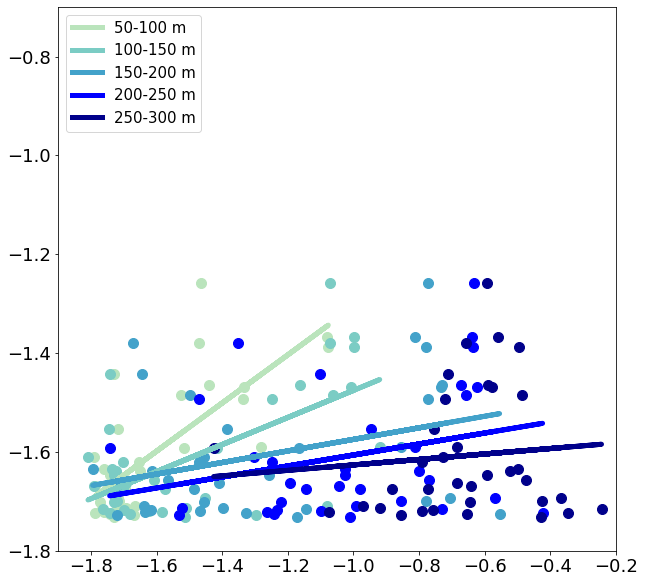

In [134]:
plt.figure(figsize=(10,10))
# data
plt.scatter(mjja2020_w_50to100avg['CT'].iloc[0:35],mjja2020_w_0to50avg['CT'].iloc[0:35],marker='o',alpha=1, s=100,color = '#bae4bc')
plt.scatter(mjja2020_w_100to150avg['CT'].iloc[0:35],mjja2020_w_0to50avg['CT'].iloc[0:35],marker='o',alpha=1,s=100,color = '#7bccc4')
plt.scatter(mjja2020_w_150to200avg['CT'].iloc[0:35],mjja2020_w_0to50avg['CT'].iloc[0:35],marker='o',alpha=1,s=100,color = '#43a2ca')
plt.scatter(mjja2020_w_200to250avg['CT'].iloc[0:35],mjja2020_w_0to50avg['CT'].iloc[0:35],marker='o',alpha=1,s=100,color = 'b')
plt.scatter(mjja2020_w_250to300avg['CT'].iloc[0:35],mjja2020_w_0to50avg['CT'].iloc[0:35],marker='o',alpha=1,s=100,color = 'darkblue')

# trendline
plt.plot(mjja2020_w_50to100avg['CT'].iloc[0:35],p50to100(mjja2020_w_50to100avg['CT'].iloc[0:35]),color = '#bae4bc',label = '50-100 m',linewidth=5)
plt.plot(mjja2020_w_100to150avg['CT'].iloc[0:35],p100to150(mjja2020_w_100to150avg['CT'].iloc[0:35]),color = '#7bccc4',label = '100-150 m',linewidth=5)
plt.plot(mjja2020_w_150to200avg['CT'].iloc[0:35],p150to200(mjja2020_w_150to200avg['CT'].iloc[0:35]),color = '#43a2ca',label = '150-200 m',linewidth=5)
plt.plot(mjja2020_w_200to250avg['CT'].iloc[0:35],p200to250(mjja2020_w_200to250avg['CT'].iloc[0:35]),color = 'b',label = '200-250 m',linewidth=5)
plt.plot(mjja2020_w_250to300avg['CT'].iloc[0:35],p250to300(mjja2020_w_250to300avg['CT'].iloc[0:35]),color = 'darkblue',label = '250-300 m',linewidth=5)

# plt.ylabel('Seal T [C] at z = 0-50 m',fontsize=15)
# plt.xlabel('Seal T at different depth intervals (see legend) [C]',fontsize=15)

# plt.title('2020',fontsize=20)

plt.xlim(-1.9,-0.2)
#plt.ylim(-1.9,-0.4)
plt.ylim(-1.8,-0.7)
plt.legend()
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=15)
plt.xticks(fontsize=18);plt.yticks(fontsize=18)  
plt.legend(loc='upper left',fontsize=15)
 
plt.savefig('fig7_2020_updated.png', format='png', dpi=400)

plt.show()

In [135]:
# get some stats

# returns (r coeff, pval)
a = (stats.pearsonr(mjja2020_w_50to100avg['CT'][0:35], mjja2020_w_0to50avg['CT'].iloc[0:35]))
b = (stats.pearsonr(mjja2020_w_100to150avg['CT'][0:35], mjja2020_w_0to50avg['CT'].iloc[0:35]))
c = (stats.pearsonr(mjja2020_w_150to200avg['CT'][0:35], mjja2020_w_0to50avg['CT'].iloc[0:35]))
d = (stats.pearsonr(mjja2020_w_200to250avg['CT'][0:35], mjja2020_w_0to50avg['CT'].iloc[0:35]))
e = (stats.pearsonr(mjja2020_w_250to300avg['CT'][0:35], mjja2020_w_0to50avg['CT'].iloc[0:35]))

a,b,c,d,e

((0.7422582883987974, 3.3275970010617907e-07),
 (0.6336018123489666, 4.393246282680253e-05),
 (0.3478691853022885, 0.04058628778973404),
 (0.2765927037361851, 0.1077313588962683),
 (0.09749517038340892, 0.5774099389972465))

In [136]:
# r2
a[0]**2,b[0]**2,c[0]**2,d[0]**2,e[0]**2

(0.5509473666967123,
 0.4014512566118951,
 0.12101297008287794,
 0.07650352376009306,
 0.009505308248089936)

### 8 I save all panels and format for submission in illustrator or powerpoint :)

Screenshot of Fig. 7 from Savidge et al., 2023:

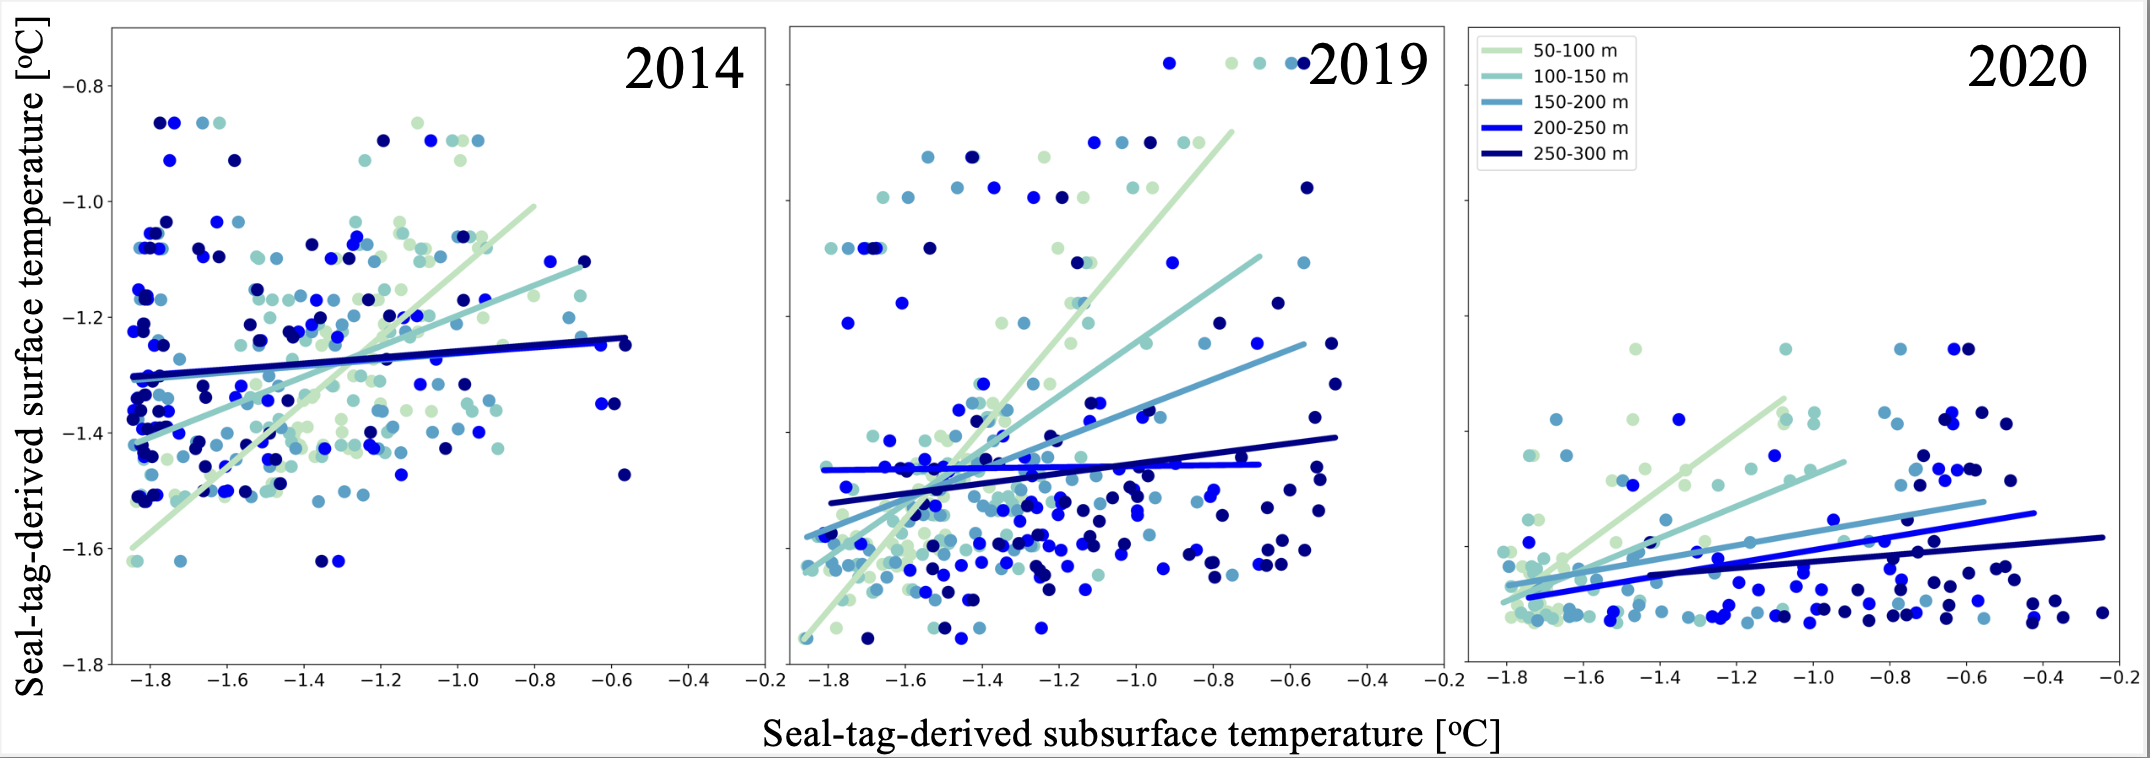

### ~ES